In [123]:
from google.colab import files
files.upload()

Saving dog.jpg to dog.jpg


{'dog.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\n\x07\x08\x16\x16\x15\x18\x15\x15\x15\x18\x18\x18\x19\x18\x18\x18\x18\x1a\x18\x18\x18\x18\x18\x1a\x18\x1a\x18\x19\x1a\x1a\x18\x18\x18\x1c!.%\x1c\x1e+\x1f\x18\x18&8&+/1555\x1a$;@;4?.451\x01\x0c\x0c\x0c\x10\x0f\x10\x1e\x12\x12\x1e4$$+144444444444444444444444444444444444414444444444?4\xff\xc0\x00\x11\x08\x00\xe4\x00\xdd\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1b\x00\x00\x01\x05\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x04\x00\x01\x03\x05\x06\x02\x07\xff\xc4\x004\x10\x00\x01\x03\x03\x03\x02\x04\x04\x06\x01\x05\x01\x00\x00\x00\x00\x01\x00\x02\x11\x03\x04!\x05\x121AQ"aq\x91\x06\x81\xa1\xb1\x132B\xc1\xd1\xf0#\x14Rr\xe1\xf1\x15\xff\xc4\x00\x19\x01\x00\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x02\x03\x01\x04\x05\xff\xc4\x00"\x11\x00\x03\x00\x02\x03\x00\x02\x02\x03\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x11!\x03\x121AQ\x132"Ba\xff\xda\x00\x0c\x03\x01

In [1]:
import tensorflow as tf

In [88]:
mobilenet_model = tf.keras.applications.MobileNetV2( input_shape=(224,224,3))

14548992/14536120 [==============================] - 0s 0us/step


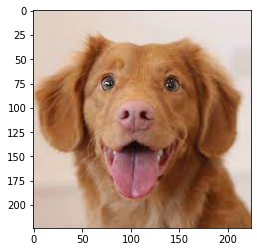

In [159]:
import matplotlib.pyplot as plt

display_image = tf.keras.preprocessing.image.load_img("dog.jpg", target_size=(224,224))
plt.imshow(display_image)


In [160]:
import tensorflow as tf
import numpy as np

def image_processing(imagepath):
  img = tf.keras.preprocessing.image.load_img(imagepath, target_size=(224,224))
  img = np.array(img)/255.0
  img = np.expand_dims(img, axis = 0)
  return img


In [161]:
tiger_path = "tiger.jpg"
dog_path = "dog.jpg"

In [162]:
# processing the image
tiger = image_processing(tiger_path)
dog = image_processing(dog_path)


In [163]:
tiger.shape, dog.shape

((1, 224, 224, 3), (1, 224, 224, 3))

In [164]:
predicted_image = mobilenet_model.predict(dog)

predicted_image.shape

(1, 1000)

In [165]:
predicted_class = np.argmax(predicted_image)


In [166]:
predicted_class

209

In [130]:
label_path = tf.keras.utils.get_file("ImageNetLabels.txt", "https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt")



label_path

'/root/.keras/datasets/ImageNetLabels.txt'

In [167]:
imagenet_labels = np.array(open(label_path).read().splitlines())

imagenet_labels

array(['background', 'tench', 'goldfish', ..., 'bolete', 'ear',
       'toilet tissue'], dtype='<U30')

Text(0.5, 1.0, 'Labrador retriever')

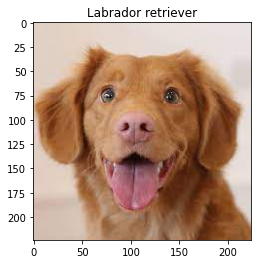

In [168]:
plt.imshow(display_image)
image_class = imagenet_labels[predicted_class]
plt.title(image_class)